In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

**Read the Dataset**

In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.shape

(768, 9)

**EDA**

In [ ]:
# distribution of outcome variable
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


<Axes: xlabel='Age', ylabel='Count'>

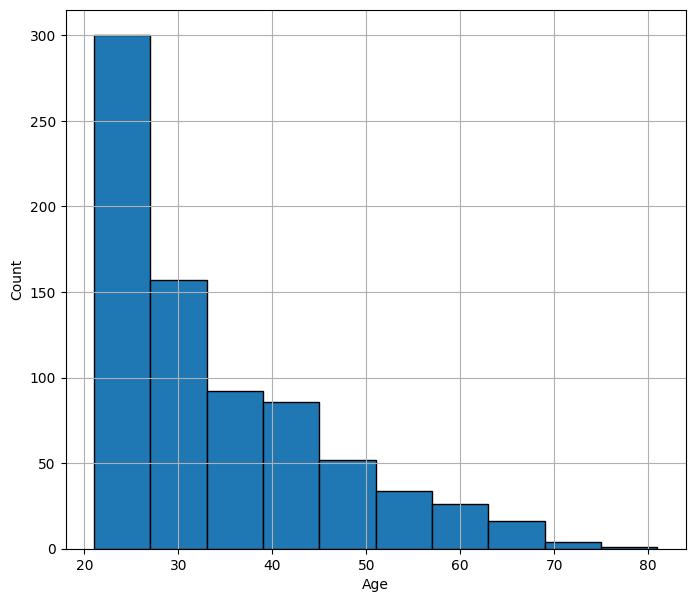

In [ ]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df.Age.hist(edgecolor="black")


In [ ]:
df['Age'].max()

81

In [ ]:
df['Age'].min()

21

<Axes: xlabel='Age', ylabel='Density'>

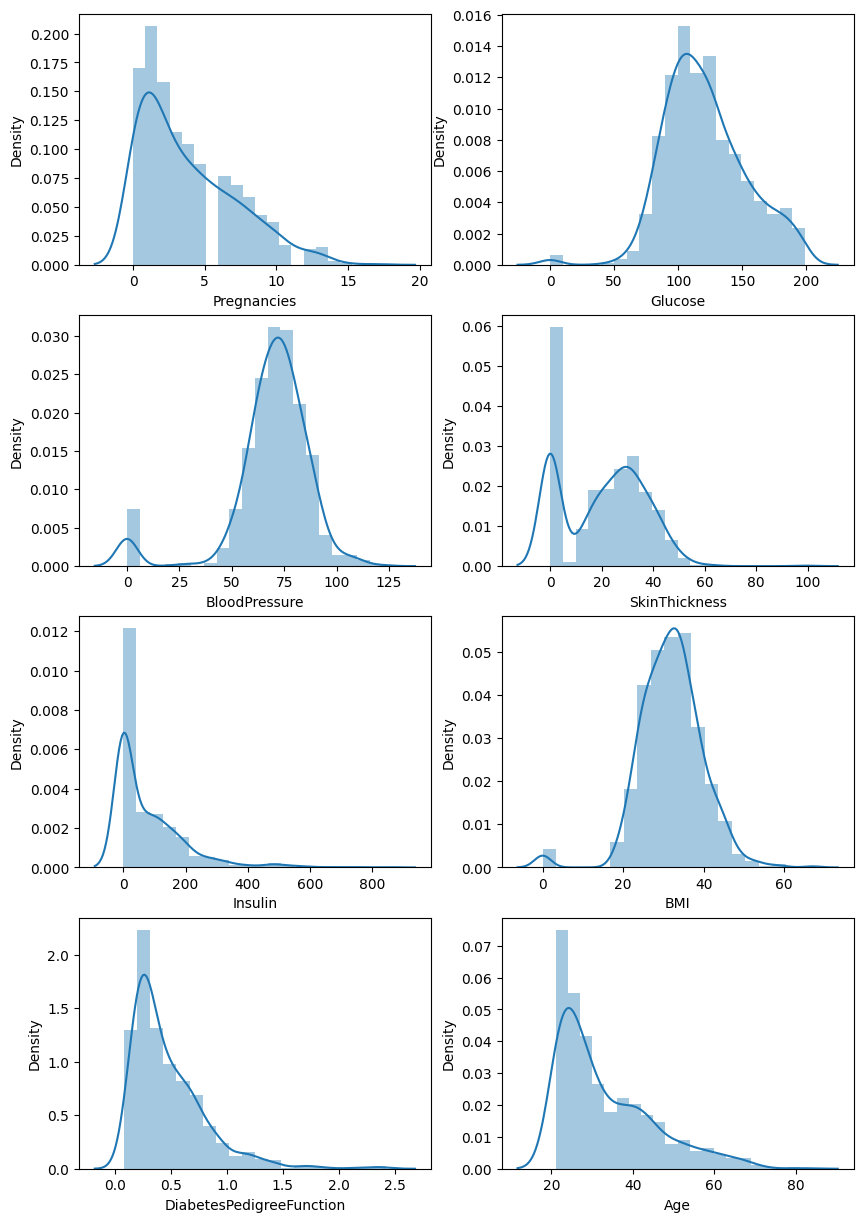

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# density graph
fig,ax=plt.subplots(4,2,figsize=(10,15))
sns.distplot(df['Pregnancies'],ax=ax[0,0],bins=20)
sns.distplot(df['Glucose'],ax=ax[0,1],bins=20)
sns.distplot(df['BloodPressure'],ax=ax[1,0],bins=20)
sns.distplot(df['SkinThickness'],ax=ax[1,1],bins=20)
sns.distplot(df['Insulin'],ax=ax[2,0],bins=20)
sns.distplot(df['BMI'],ax=ax[2,1],bins=20)
sns.distplot(df['DiabetesPedigreeFunction'],ax=ax[3,0],bins=20)
sns.distplot(df['Age'],ax=ax[3,1],bins=20)

In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<Axes: >

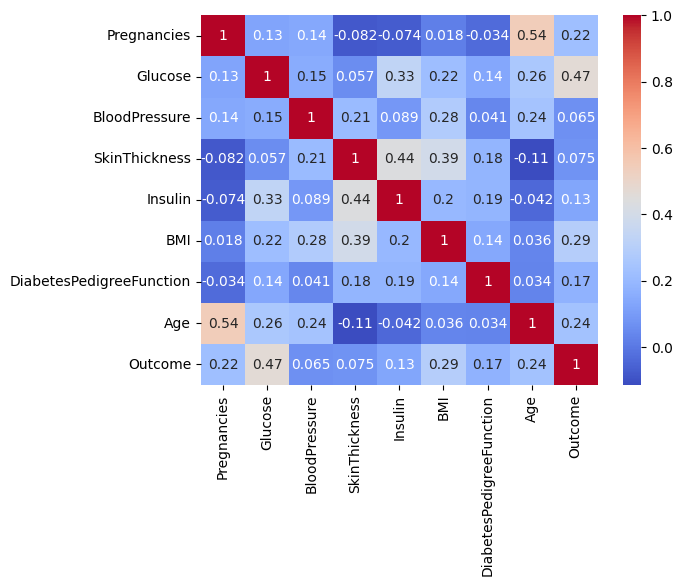

In [ ]:
#correlation of dataset
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

**Data Preproccsing**

In [ ]:
# here in this dataset 0s are Nullvalue to replace 0 with null
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
              'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [ ]:
df.isnull().sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

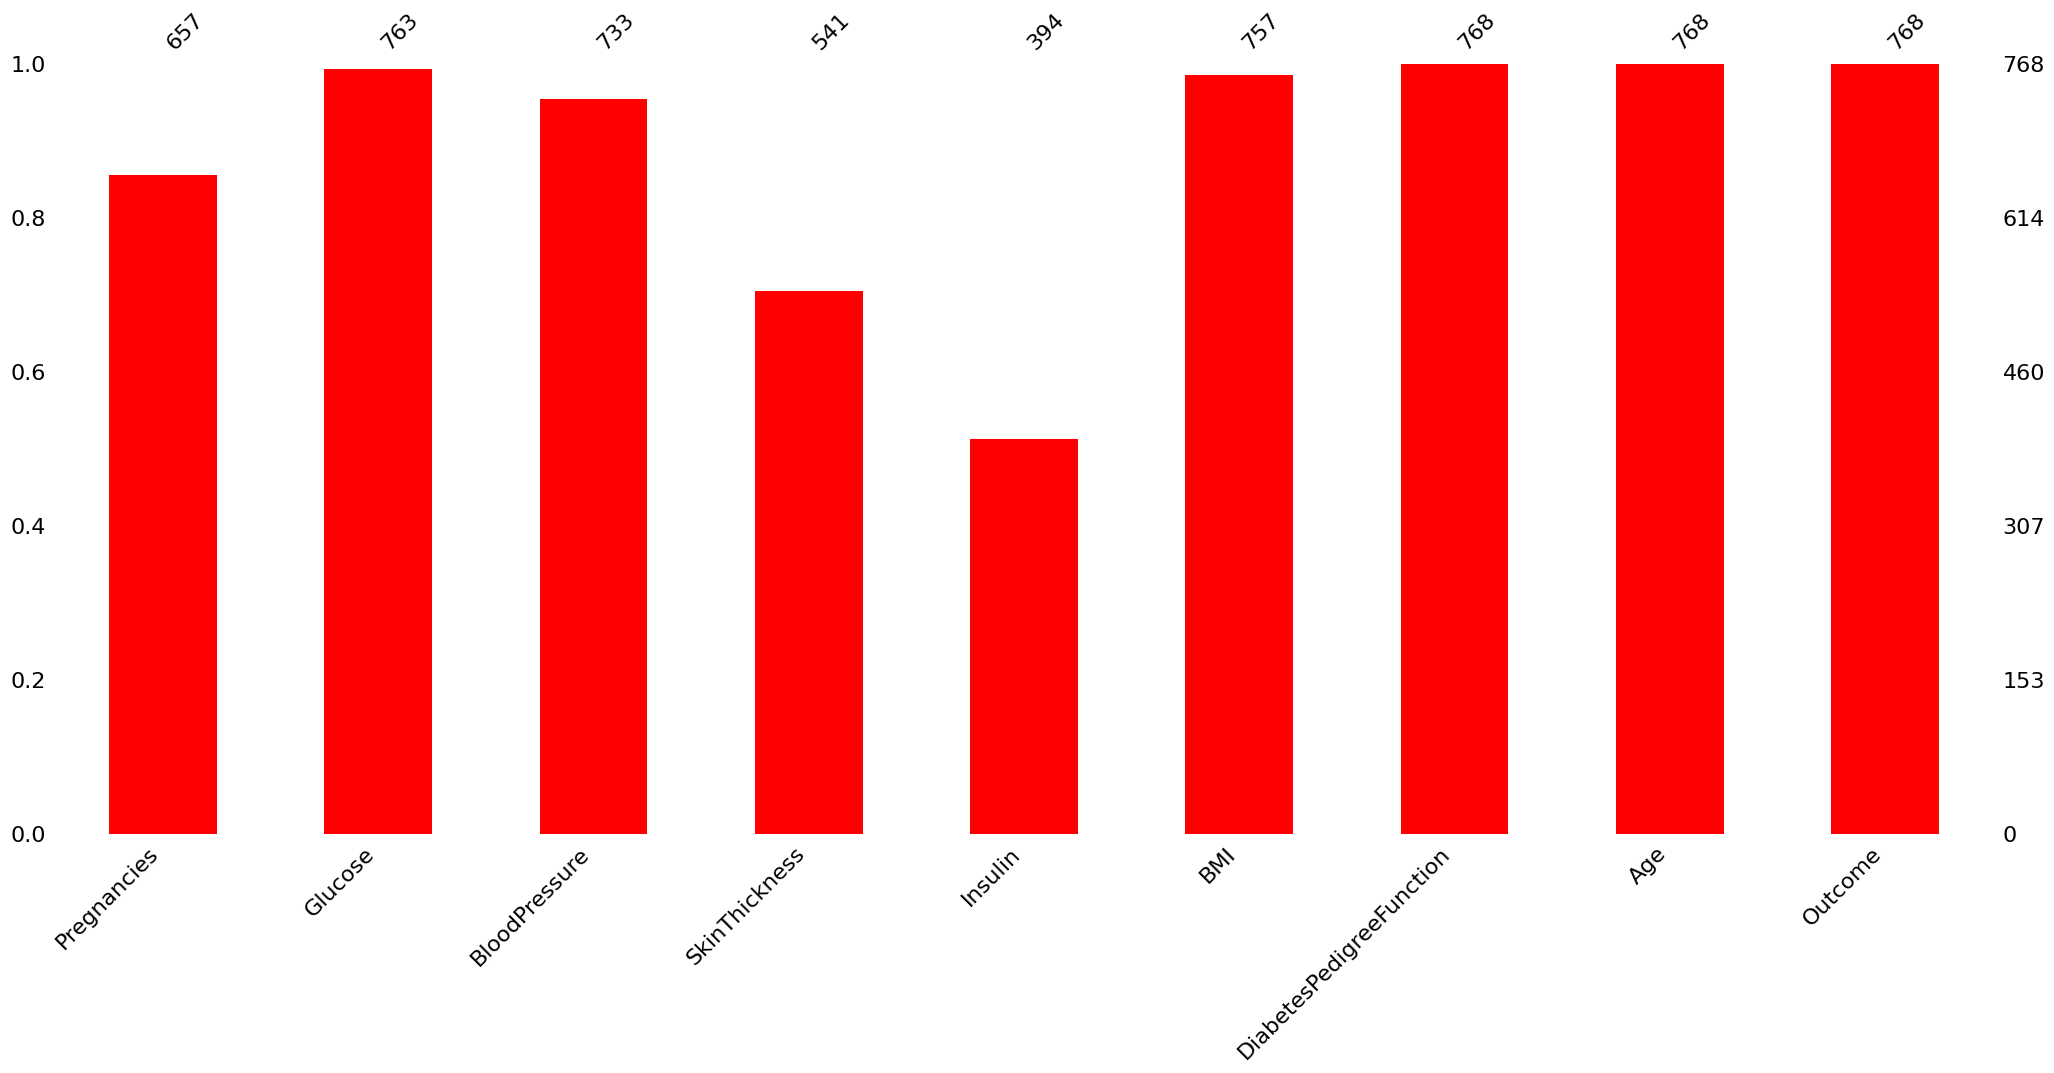

In [ ]:
import missingno as msno
msno.bar(df,color="red")

In [ ]:
#impute using median value according the value columns
def median_target(var):
  temp = df[df[var].notnull()]
  temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
  return temp

In [ ]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
  median_target(i)
  df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
  df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# adding column for BMI
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [ ]:
NewBMI

,0
0,Underweight
1,Normal
2,Overweight
3,Obesity 1
4,Obesity 2
5,Obesity 3


In [ ]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [ ]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
      return "Normal"
    else:
      return "Abnormal"

In [ ]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [ ]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [ ]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal,Secret
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [ ]:
# One hot encoding
df = pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,False,True,False,False,False,False,False,False,False,True
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,True,False,False,False,True,False,True,False,False
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,False,True,False,False,False,False,False,False,False,True
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,True,False,False,False,True,False,True,False,False
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False,True


In [ ]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
              'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low', 'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [ ]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,False,True,False,False,False,False,False,False,False,True
1,False,True,False,False,False,True,False,True,False,False
2,False,True,False,False,False,False,False,False,False,True
3,False,True,False,False,False,True,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True


In [ ]:
y=df['Outcome']
X=df.drop(['Outcome','NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight', 'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
                     'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [ ]:
cols=X.columns

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X=pd.DataFrame(X,columns=cols)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.539221,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995
1,-1.122584,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672
2,1.203944,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584
3,-1.122584,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549
4,0.206860,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496


In [ ]:
X = pd.concat([X, categorical_df], axis=1)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.539221,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995,False,True,False,False,False,False,False,False,False,True
1,-1.122584,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672,False,True,False,False,False,True,False,True,False,False
2,1.203944,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584,False,True,False,False,False,False,False,False,False,True
3,-1.122584,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549,False,True,False,False,False,True,False,True,False,False
4,0.206860,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496,False,False,True,False,False,False,False,False,False,True


In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

***Model Building***

In [ ]:
# Logistic regression

In [ ]:

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[96, 11],
       [ 7, 40]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       107
           1       0.78      0.85      0.82        47

    accuracy                           0.88       154
   macro avg       0.86      0.87      0.87       154
weighted avg       0.89      0.88      0.88       154



In [ ]:
log_reg_acc = accuracy_score(y_test, y_pred)

In [ ]:
log_reg_acc

0.8831168831168831

In [ ]:
# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(accuracy_score(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8827361563517915
0.8506493506493507
[[96 11]
 [ 7 40]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       107
           1       0.78      0.85      0.82        47

    accuracy                           0.88       154
   macro avg       0.86      0.87      0.87       154
weighted avg       0.89      0.88      0.88       154



In [ ]:
# SVM
from sklearn.svm import SVC
svc = SVC(probability=True)

In [ ]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameter = {
      "gamma":[0.0001, 0.001, 0.01, 0.1],
       'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
    }
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [ ]:
grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [ ]:
grid_search.best_score_

0.8582700253232041

In [ ]:
svc = SVC(C=10, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8680781758957655
0.8961038961038961
[[99  8]
 [ 8 39]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
           1       0.83      0.83      0.83        47

    accuracy                           0.90       154
   macro avg       0.88      0.88      0.88       154
weighted avg       0.90      0.90      0.90       154



In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [ ]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
     'splitter' : ['best','radom'],
     'min_samples_leaf':[1,2,3,5,7],
     'min_samples_split':[1,2,3,5,7],
      'max_features':['auto','sqrt','log2']
      }
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [ ]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 3,
 'splitter': 'best'}

In [ ]:
grid_search_dt.best_score_

0.8658974358974361

In [ ]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8908794788273615
0.8441558441558441
[[92 15]
 [ 9 38]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       107
           1       0.72      0.81      0.76        47

    accuracy                           0.84       154
   macro avg       0.81      0.83      0.82       154
weighted avg       0.85      0.84      0.85       154



In [ ]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [ ]:
parameters = {
      'loss': ['deviance', 'exponential'],
          'learning_rate': [0.001, 0.1, 1, 10],
              'n_estimators': [100, 150, 180, 200]
              }
grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [ ]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 200}

In [ ]:
grid_search_gbc.best_score_

0.8793231094658911

In [ ]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=150)

In [ ]:

gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.9025974025974026
[[98  9]
 [ 6 41]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       107
           1       0.82      0.87      0.85        47

    accuracy                           0.90       154
   macro avg       0.88      0.89      0.89       154
weighted avg       0.90      0.90      0.90       154



In [ ]:
# XG Boost
from xgboost import XGBClassifier
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(accuracy_score(y_test, xgb.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9755700325732899
0.9025974025974026
[[100   7]
 [  8  39]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
           1       0.85      0.83      0.84        47

    accuracy                           0.90       154
   macro avg       0.89      0.88      0.88       154
weighted avg       0.90      0.90      0.90       154



In [ ]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier',  'Gradient Boosting Classifier','XgBoost'],
     'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dt_acc,4),
                    100*round(gbc_acc,4),100*round(xgb_acc,4)]
                })
models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Gradient Boosting Classifier,90.26
5,XgBoost,90.26
2,SVM,89.61
0,Logistic Regression,88.31
1,KNN,85.06
3,Decision Tree Classifier,84.42


**Pickle File**

In [ ]:
import pickle

In [ ]:
pickle.dump(xgb, open('diabetes-model.pkl', 'wb'))